In [27]:
import pandas as pd
import plotly.express as px
import numpy as np
pd.set_option("mode.chained_assignment", None)
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

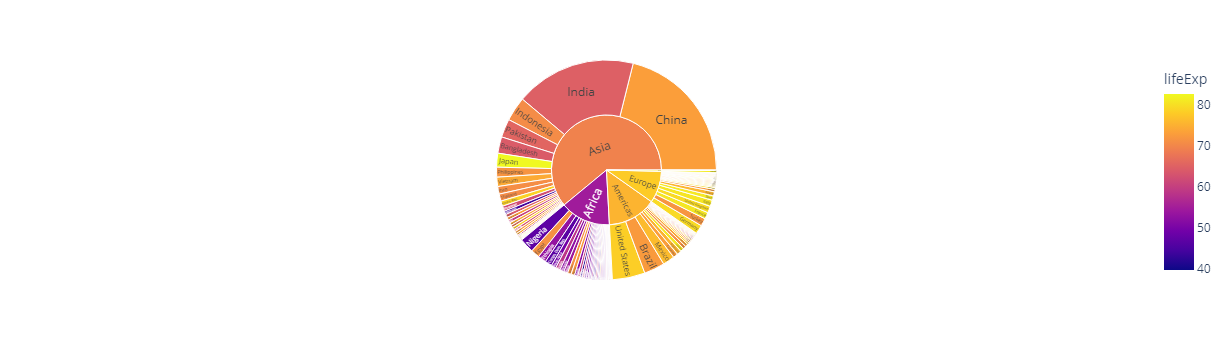

In [8]:
import plotly.express as px

df = px.data.gapminder().query("year == 2007")
fig = px.sunburst(df, path=['continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'])
fig.show()

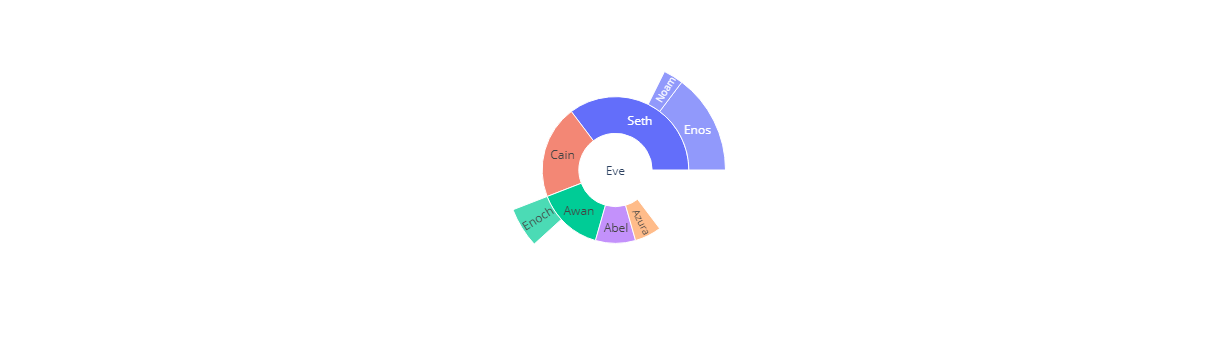

In [11]:
import plotly.express as px
data = dict(
    character=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parent=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    value=[10, 14, 12, 10, 2, 6, 6, 4, 4])

fig = px.sunburst(
    data,
    names='character',
    parents='parent',
    values='value',
)
fig.show()

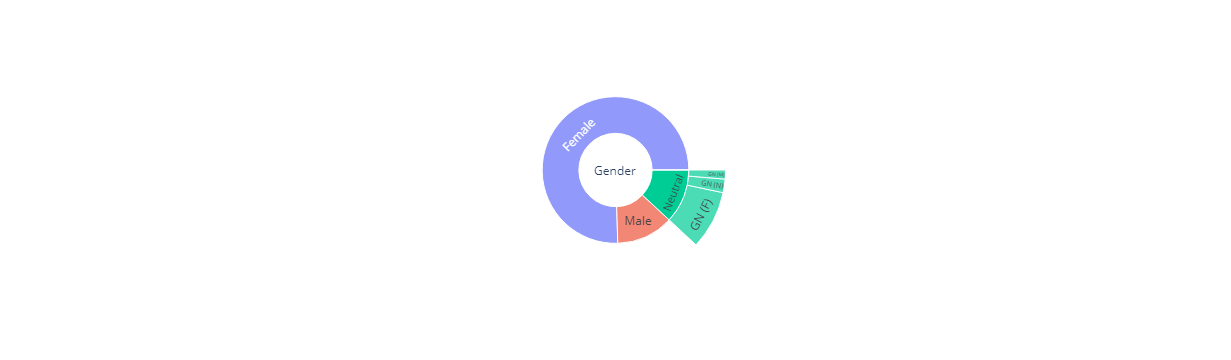

In [7]:
import pandas as pd
import plotly.express as px
import numpy as np
pd.set_option("mode.chained_assignment", None)
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline
%run ~/Data/Core.ipynb

Process_GA()
TGL = pd.read_csv('/home/jovyan/Data/Gender.csv')
fig = px.sunburst(TGL,
                  names='Gender',
                  parents='Parent',
                  values='Count'
                 )
fig.show()

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
pd.set_option("mode.chained_assignment", None)
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline
%run ~/Data/Core.ipynb

Process_Race()

In [71]:
import numpy as np
TRL = pd.read_csv('/home/jovyan/Data/Race.csv')


Cor_Sub_Race = []
Cor_Race = []
Cor_Count = []

#TRL.at[x1,'Tag2']
for x1, y1 in TRL.iterrows():
    cont = TRL.at[x1,'Count']
    if cont > 0:
        SubR = TRL.at[x1,'Sub-Race']
        if not isinstance(SubR, str):
            SubR = TRL.at[x1,'Source']

        Cor_Sub_Race.append(SubR)
        Cor_Race.append(TRL.at[x1,'Race'])
        Cor_Count.append(cont)


myset = set(Cor_Race)
Cor_Race_Uni = list(myset)
Fin_Sub_Race = [""]
Fin_Race = ["Race"]
Fin_Count = [0]

for RU in Cor_Race_Uni:
    Fin_Sub_Race.append(RU)
    Fin_Race.append("Race")
    Fin_Count.append(0)


Cor = {'Race': Cor_Race,
       'SubRace': Cor_Sub_Race,
       'Count': Cor_Count
      }


for RU in Cor_Sub_Race:
    Fin_Sub_Race.append(RU)
for RU in Cor_Race:
    Fin_Race.append(RU)
for RU in Cor_Count:
    Fin_Count.append(RU)



Tem = {'Race': Fin_Race,
       'SubRace': Fin_Sub_Race,
       'Count': Fin_Count
      }

df = pd.DataFrame(Tem)
df = df.iloc[::-1]


for x1, y1 in df.iterrows():
    for x2, y2 in df.iterrows():
        if df.at[x1,'Race'] == df.at[x2,'SubRace']:
            df.at[x2,'Count'] += df.at[x1,'Count']

for x1, y1 in df.iterrows():
    if df.at[x1,'Race'] == 'Race' and df.at[x1,'SubRace'] == '':
        for x2, y2 in df.iterrows():
            if df.at[x2,'Race'] ==  'Race':
                df.at[x1,'Count'] += df.at[x2,'Count']
            
            
            
df = df.iloc[::-1]
df.to_csv('/home/jovyan/Data/Temp.csv', index=False) #<<<<<<<
df

Race          SubRace  Count
0        Race                     304
1        Race       Spirithost      1
2        Race         Minotaur      1
3        Race        Kalashtar      1
4        Race  Awakened Blight      2
..        ...              ...    ...
106   Kitsune             Rage      1
107   Domovoi     Basils Brews      1
108   Sisalik          Sisalik      2
109  Deepling              TEB      1
110   Selkies             HGtV      1

[111 rows x 3 columns]

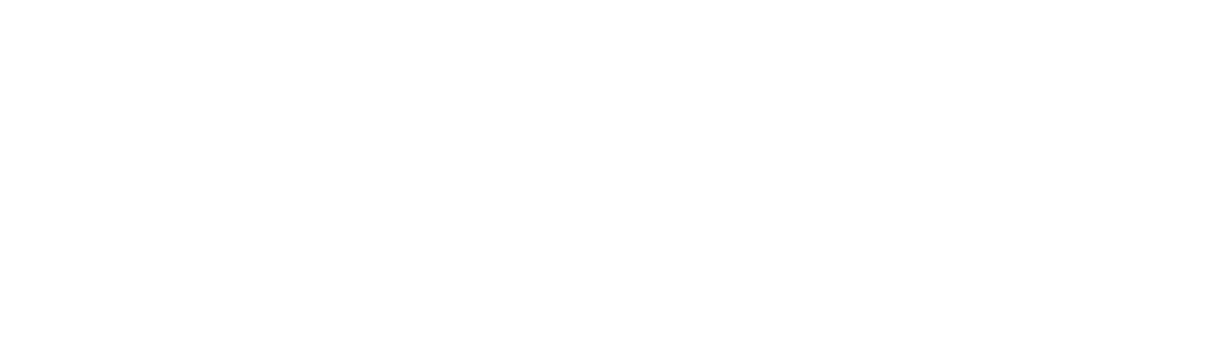

In [72]:
fig = px.sunburst(df,
                  names='SubRace',
                  parents='Race',
                  values='Count'
                 )
fig.show()

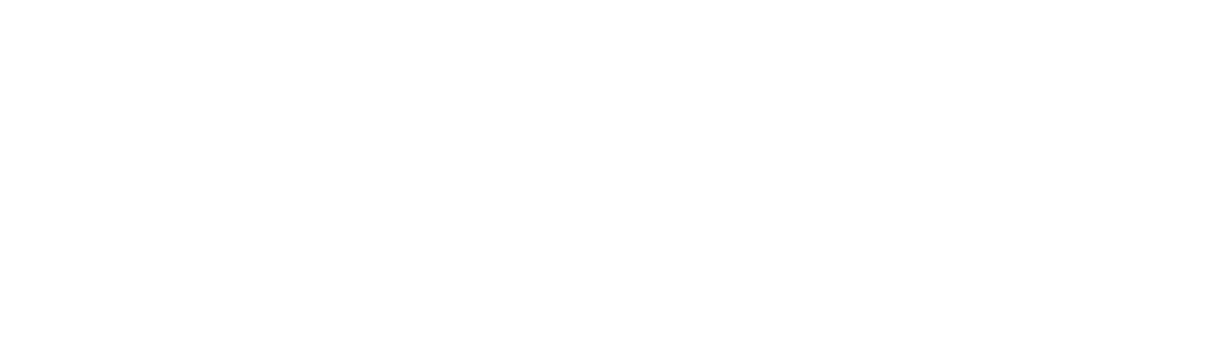

In [73]:
fig = px.sunburst(df,
                  names='Race',
                  parents='SubRace',
                  values='Count'
                 )
fig.show()